# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set monthly household income
monthly_income = 12000

In [4]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [6]:
# Fetch current BTC price
btc_response = requests.get(btc_url)
btc_data = btc_response.json()

# Check btc_data
# print(json.dumps(btc_data, indent = 3))

# Get current BTC price 
btc_price = btc_data["data"]["1"]["quotes"]["USD"]["price"]

In [7]:
# Fetch current ETH price
eth_response = requests.get(eth_url)
eth_data = eth_response.json()

# Check eth_data
# print(json.dumps(eth_data, indent = 3))

# Get current ETH price
eth_price = eth_data["data"]["1027"]["quotes"]["USD"]["price"]

In [8]:
# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price
total_crypto_wallet = my_btc_value + my_eth_value

In [9]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:,.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:,.2f}")
print(f"The current value of your entire cryptocurrency wallet is ${total_crypto_wallet:,.2f}")

The current value of your 1.2 BTC is $26,811.60
The current value of your 5.3 ETH is $8,263.18
The current value of your entire cryptocurrency wallet is $35,074.78


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [10]:
# Set current amount of shares
my_agg = 200
my_spy = 110

In [11]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version="v2")

In [12]:
# Format current date as ISO format
start_date = pd.Timestamp("2022-07-15", tz = "America/New_York").isoformat()
end_date = pd.Timestamp("2022-07-15", tz = "America/New_York").isoformat()

# Set the tickers
ticker = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Run Alpaca to get last day's prices
ticker1_df = alpaca.get_bars(
    symbol=ticker,
    timeframe=timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Preview ticker1_df
# ticker1_df

# Separate ticker data
agg_ticker = ticker1_df[ticker1_df["symbol"]=="AGG"].drop("symbol", axis=1)
spy_ticker = ticker1_df[ticker1_df["symbol"]=="SPY"].drop("symbol", axis = 1)

# Concatenate the ticker DataFrames
ticker_df = pd.concat([agg_ticker, spy_ticker], axis = 1, keys = ["AGG", "SPY"])

# Preview ticker_df
# ticker_df

# Get current closing prices for SPY and AGG
agg_close_price = ticker_df["AGG"]["close"][0]
spy_close_price = ticker_df["SPY"]["close"][0]

In [13]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $102.25
Current SPY closing price: $385.13


In [14]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
total_stocks_bonds = my_spy_value + my_agg_value

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0,.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0,.2f}")
print(f"The current combined value of your stocks and bonds is ${total_stocks_bonds:0,.2f}")

The current value of your 110 SPY shares is $42,364.30
The current value of your 200 AGG shares is $20,450.00
The current combined value of your stocks and bonds is $62,814.30


### Savings Health Analysis

In [15]:
# Consolidate financial assets data
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Create savings DataFrame
savings_df = pd.DataFrame(savings_data, columns = ["amount"], index = ["crypto", "stocks and bonds"])

# Display savings DataFrame
display(savings_df)

,amount
crypto,35074.777
stocks and bonds,62814.300


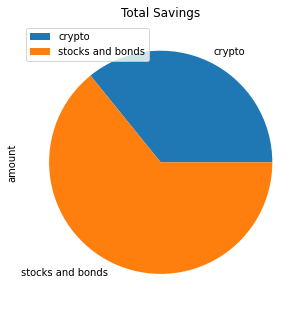

In [16]:
# Plot savings pie chart
savings_df.plot.pie(y = 0, title = "Total Savings", figsize=(5,10));
plt.legend(loc="upper left");

In [17]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = sum(savings_data)

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have more than 3 months of savings in your emergency fund.")
elif total_savings == emergency_fund:
    print("Keep going! You have exactly 3 months of savings in your emergency fund.")
else:
    print("Don't worry, you're ${emergency_fund - savings_fund} away from your goal.")

Congratulations! You have more than 3 months of savings in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [18]:
# Set start and end dates of ten years back from today.
start_date = pd.Timestamp('2012-07-16', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-07-16', tz='America/New_York').isoformat()

In [20]:
# Get ten years' worth of historical data for SPY and AGG
# Note: Alpaca only goes back to 2015-12-01
tenyrs_stocks_bonds1_df = alpaca.get_bars(
    symbol = ticker,
    timeframe = timeframe,
    start = start_date,
    end = end_date,
).df

# Preview tenyrs_stocks_bonds1_df
# tenyrs_stocks_bonds1_df

# Separate ticker data
agg_tenyrs_ticker = tenyrs_stocks_bonds1_df[tenyrs_stocks_bonds1_df["symbol"]=="AGG"].drop("symbol", axis = 1)
spy_tenyrs_ticker = tenyrs_stocks_bonds1_df[tenyrs_stocks_bonds1_df["symbol"]=="SPY"].drop("symbol", axis = 1)

# Concatenate the ticker DataFrames
tenyrs_stocks_bonds_df = pd.concat([agg_tenyrs_ticker, spy_tenyrs_ticker], axis = 1, keys = ["AGG", "SPY"])

# Display sample data
tenyrs_stocks_bonds_df

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2015-12-01 05:00:00+00:00  108.54  108.8400  108.4300  108.82  4259986   
2015-12-02 05:00:00+00:00  108.73  108.7799  108.6100  108.67  2462787   
2015-12-03 05:00:00+00:00  108.41  108.4100  107.8100  107.89  4634020   
2015-12-04 05:00:00+00:00  108.05  108.3000  108.0000  108.24  2182057   
2015-12-07 05:00:00+00:00  108.30  108.5800  108.2300  108.40  2143773   
...                           ...       ...       ...     ...      ...   
2022-07-11 04:00:00+00:00  101.67  101.9200  101.6029  101.70  5758310   
2022-07-12 04:00:00+00:00  102.02  102.1900  101.8200  101.84  6664991   
2022-07-13 04:00:00+00:00  101.23  102.2400  101.1900  102.21  6514247   
2022-07-14 04:00:00+00:00  101.51  101.9800  101.3300  101.85  6224496   
2022-07-15 04:00:00+00:00  101.94  102.3500  101.9000  102.25  8440151   

                                                      SPY                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2015-12-01 05:00:00+00:00       15562  108.754152  209.42  210.8200  209.1100   
2015-12-02 05:00:00+00:00       11581  108.684692  210.60  211.0000  208.2300   
2015-12-03 05:00:00+00:00       16801  108.040315  208.90  209.1500  204.7511   
2015-12-04 05:00:00+00:00        9796  108.192232  206.10  209.9700  205.9300   
2015-12-07 05:00:00+00:00        9104  108.460067  209.20  209.7295  207.2000   
...                               ...         ...     ...       ...       ...   
2022-07-11 04:00:00+00:00       17084  101.720884  385.91  386.8700  383.5000   
2022-07-12 04:00:00+00:00       21057  102.039440  383.66  386.1600  378.9900   
2022-07-13 04:00:00+00:00       26716  101.977478  375.09  381.9200  374.6580   
2022-07-14 04:00:00+00:00       24722  101.747120  373.99  379.0498  371.0400   
2022-07-15 04:00:00+00:00       27300  102.214854  382.62  385.2500  380.5400   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2015-12-01 05:00:00+00:00  210.68   97858418      337780  209.921410  
2015-12-02 05:00:00+00:00  208.54  108069059      367013  209.563055  
2015-12-03 05:00:00+00:00  205.58  166224154      546768  206.878936  
2015-12-04 05:00:00+00:00  209.66  192878747      556731  208.178631  
2015-12-07 05:00:00+00:00  208.27  102027111      374705  208.276128  
...                           ...        ...         ...         ...  
2022-07-11 04:00:00+00:00  384.23   58100363      473423  384.871994  
2022-07-12 04:00:00+00:00  380.83   62027220      512244  382.617620  
2022-07-13 04:00:00+00:00  378.83   83575452      671953  378.819688  
2022-07-14 04:00:00+00:00  377.91   89349688      637416  375.589384  
2022-07-15 04:00:00+00:00  385.13   79318992      488124  383.334989  

[1667 rows x 14 columns]

In [21]:
# Configure a Monte Carlo simulation to forecast 30 years cumulative returns
mc_thirty = MCSimulation(portfolio_data = tenyrs_stocks_bonds_df, 
                  weights = [.40,.60], 
                  num_simulation = 500, 
                  num_trading_days = 252*30)

In [22]:
# Print the simulation input data
mc_thirty.portfolio_data

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2015-12-01 05:00:00+00:00  108.54  108.8400  108.4300  108.82  4259986   
2015-12-02 05:00:00+00:00  108.73  108.7799  108.6100  108.67  2462787   
2015-12-03 05:00:00+00:00  108.41  108.4100  107.8100  107.89  4634020   
2015-12-04 05:00:00+00:00  108.05  108.3000  108.0000  108.24  2182057   
2015-12-07 05:00:00+00:00  108.30  108.5800  108.2300  108.40  2143773   
...                           ...       ...       ...     ...      ...   
2022-07-11 04:00:00+00:00  101.67  101.9200  101.6029  101.70  5758310   
2022-07-12 04:00:00+00:00  102.02  102.1900  101.8200  101.84  6664991   
2022-07-13 04:00:00+00:00  101.23  102.2400  101.1900  102.21  6514247   
2022-07-14 04:00:00+00:00  101.51  101.9800  101.3300  101.85  6224496   
2022-07-15 04:00:00+00:00  101.94  102.3500  101.9000  102.25  8440151   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2015-12-01 05:00:00+00:00       15562  108.754152          NaN  209.42   
2015-12-02 05:00:00+00:00       11581  108.684692    -0.001378  210.60   
2015-12-03 05:00:00+00:00       16801  108.040315    -0.007178  208.90   
2015-12-04 05:00:00+00:00        9796  108.192232     0.003244  206.10   
2015-12-07 05:00:00+00:00        9104  108.460067     0.001478  209.20   
...                               ...         ...          ...     ...   
2022-07-11 04:00:00+00:00       17084  101.720884     0.004643  385.91   
2022-07-12 04:00:00+00:00       21057  102.039440     0.001377  383.66   
2022-07-13 04:00:00+00:00       26716  101.977478     0.003633  375.09   
2022-07-14 04:00:00+00:00       24722  101.747120    -0.003522  373.99   
2022-07-15 04:00:00+00:00       27300  102.214854     0.003927  382.62   

                                                                              \
                               high       low   close     volume trade_count   
timestamp                                                                      
2015-12-01 05:00:00+00:00  210.8200  209.1100  210.68   97858418      337780   
2015-12-02 05:00:00+00:00  211.0000  208.2300  208.54  108069059      367013   
2015-12-03 05:00:00+00:00  209.1500  204.7511  205.58  166224154      546768   
2015-12-04 05:00:00+00:00  209.9700  205.9300  209.66  192878747      556731   
2015-12-07 05:00:00+00:00  209.7295  207.2000  208.27  102027111      374705   
...                             ...       ...     ...        ...         ...   
2022-07-11 04:00:00+00:00  386.8700  383.5000  384.23   58100363      473423   
2022-07-12 04:00:00+00:00  386.1600  378.9900  380.83   62027220      512244   
2022-07-13 04:00:00+00:00  381.9200  374.6580  378.83   83575452      671953   
2022-07-14 04:00:00+00:00  379.0498  371.0400  377.91   89349688      637416   
2022-07-15 04:00:00+00:00  385.2500  380.5400  385.13   79318992      488124   

                                                    
                                 vwap daily_return  
timestamp                                           
2015-12-01 05:00:00+00:00  209.921410          NaN  
2015-12-02 05:00:00+00:00  209.563055    -0.010158  
2015-12-03 05:00:00+00:00  206.878936    -0.014194  
2015-12-04 05:00:00+00:00  208.178631     0.019846  
2015-12-07 05:00:00+00:00  208.276128    -0.006630  
...                               ...          ...  
2022-07-11 04:00:00+00:00  384.871994    -0.011424  
2022-07-12 04:00:00+00:00  382.617620    -0.008849  
2022-07-13 04:00:00+00:00  378.819688    -0.005252  
2022-07-14 04:00:00+00:00  375.589384    -0.002429  
2022-07-15 04:00:00+00:00  383.334989     0.019105  

[1667 rows x 16 columns]

In [23]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_thirty.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999693,0.993835,1.005535,0.989969,1.006427,0.987402,0.993627,1.009744,0.996341,1.000719,...,0.993497,0.995256,0.992119,1.024029,1.011890,1.004102,1.002493,1.000902,0.995582,1.004435
2,1.000149,0.993807,1.019843,0.979387,1.013990,0.999382,1.002037,1.009583,1.005939,1.003073,...,0.987749,0.991882,0.986099,1.025216,1.017563,1.011691,1.005085,1.000235,1.005823,1.006253
3,1.003092,0.981102,1.023736,0.975336,1.016542,0.993766,1.004271,1.004913,0.994369,0.997301,...,0.983856,0.992676,0.992537,1.020372,1.029013,1.008209,1.004311,0.999433,1.007666,1.001604
4,1.011184,0.981997,1.025786,0.989685,1.015579,0.989033,1.008351,1.016452,1.007481,0.981735,...,0.978112,0.995839,0.992778,1.030678,1.039069,1.011237,0.995765,0.996406,0.996191,0.996658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.775425,4.893451,26.678752,10.416443,6.010549,4.646895,2.939955,2.495678,5.461164,4.958401,...,2.009195,9.130062,12.589545,4.813821,2.623424,3.957544,3.896339,2.015662,8.036235,2.591667
7557,6.822014,4.886519,26.828863,10.241070,6.034902,4.632015,2.933960,2.495413,5.487663,4.944534,...,2.020697,9.119370,12.563367,4.836115,2.606545,3.917829,3.889511,2.004779,8.010791,2.586626
7558,6.979892,4.859052,26.681388,10.243156,5.983398,4.573759,2.938177,2.492086,5.518510,4.948272,...,2.029784,9.181801,12.628082,4.863869,2.628938,3.932668,3.913551,2.005835,8.130988,2.611390
7559,6.974348,4.855276,26.353839,10.102334,6.019979,4.564650,2.950492,2.499609,5.549130,4.969764,...,2.034579,9.367029,12.701784,4.836762,2.602504,3.924864,3.916953,2.020867,8.081721,2.618323


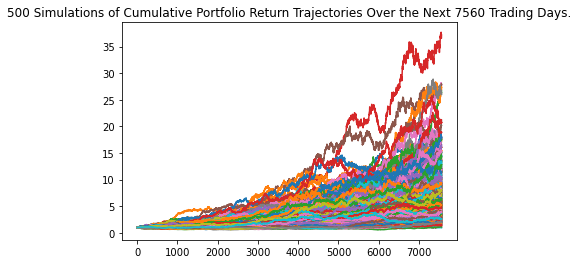

In [24]:
# Plot simulation outcomes
mc_thirty.plot_simulation();

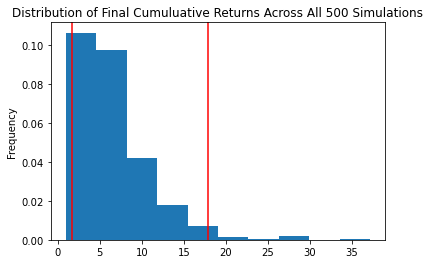

In [25]:
# Plot probability distribution and confidence intervals
mc_thirty.plot_distribution();

### Retirement Analysis

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_summary = mc_thirty.summarize_cumulative_return()

# Print summary statistics from the Monte Carlo simulation results
mc_summary

count           500.000000
mean              6.587260
std               4.525680
min               0.956663
25%               3.516535
50%               5.390842
75%               8.301984
max              37.183012
95% CI Lower      1.659597
95% CI Upper     17.827201
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [28]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = mc_summary[8] * initial_investment
ci_upper = mc_summary[9] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.2f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:,.2f} and ${ci_upper:,.2f}.")

There is a 95% chance that an initial investment of $20,000.00 in the portfolio over the next 30 years will end within in the range of $33,191.93 and $356,544.02.


### Ten Years Retirement Forecast

In [29]:
# Configuring a Monte Carlo simulation to forecast ten years cumulative returns
mc_ten = MCSimulation(portfolio_data = tenyrs_stocks_bonds_df, 
                  weights = [.20,.80], 
                  num_simulation = 500, 
                  num_trading_days = 252*10)

In [30]:
# Running a Monte Carlo simulation to forecast ten years cumulative returns
mc_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011417,1.011617,0.990034,0.983118,1.000677,1.017025,0.999748,0.998718,0.996140,1.000842,...,1.007470,0.999771,0.992351,0.995681,0.997046,0.998639,0.989489,0.997305,1.014766,0.998606
2,1.000025,1.018101,0.981801,0.978676,0.996161,1.021775,0.987356,0.990667,0.995298,0.997308,...,1.020095,1.007329,0.997619,0.990389,1.005445,0.999481,0.996761,0.985642,1.036130,1.003613
3,0.996991,1.005862,0.971775,0.968912,0.990516,1.018867,0.973870,0.994863,0.993570,1.007626,...,1.015542,1.009660,1.001467,0.986151,0.994645,1.004994,0.990667,0.988163,1.026907,1.019568
4,1.009612,1.005536,0.966860,0.985693,0.994514,1.009416,0.960921,1.012157,0.995817,0.996654,...,1.013248,1.004016,0.997699,0.990079,1.013171,1.020044,0.986970,0.977241,1.027989,1.023589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.268678,1.887854,1.588447,2.139624,2.790548,2.819932,4.983663,1.456828,1.894986,1.985240,...,2.817324,1.760944,4.087883,1.587227,3.260301,2.283212,1.490039,2.962582,0.626987,1.881145
2517,3.302250,1.913106,1.564936,2.146777,2.796294,2.779071,5.037787,1.458235,1.881841,2.009469,...,2.853788,1.791247,4.139797,1.582737,3.270657,2.306832,1.484174,2.948001,0.620679,1.872030
2518,3.283888,1.935689,1.561193,2.163704,2.774488,2.741578,4.995778,1.474717,1.874488,1.994079,...,2.868489,1.771951,4.138355,1.607737,3.270055,2.311038,1.505869,2.972833,0.639453,1.885126
2519,3.295660,1.948047,1.549812,2.209336,2.779799,2.730907,4.980648,1.482800,1.887067,1.978952,...,2.872869,1.769813,4.143946,1.588699,3.276930,2.321435,1.507968,2.970570,0.636867,1.896215


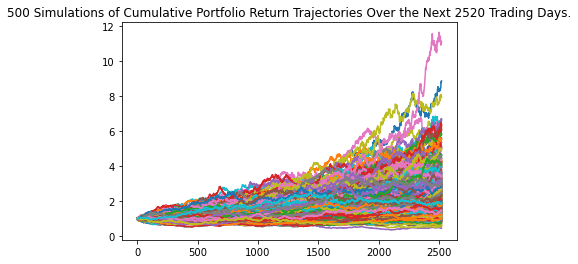

In [31]:
# Plot simulation outcomes
mc_ten.plot_simulation();

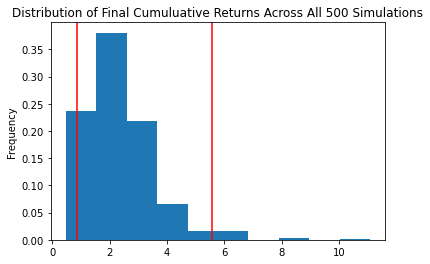

In [32]:
# Plot probability distribution and confidence intervals
mc_ten.plot_distribution();

In [33]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_ten_summary = mc_ten.summarize_cumulative_return()

# Print summary statistics
mc_ten_summary

count           500.000000
mean              2.379970
std               1.232458
min               0.474750
25%               1.530983
50%               2.126200
75%               2.921771
max              11.088398
95% CI Lower      0.868635
95% CI Upper      5.568994
Name: 2520, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [34]:
# Set initial investment
initial_investment_ten = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = mc_ten_summary[8] * initial_investment_ten
ci_upper_ten = mc_ten_summary[9] * initial_investment_ten

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten:,.2f} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten:,.2f} and ${ci_upper_ten:,.2f}")

There is a 95% chance that an initial investment of $20,000.00 in the portfolio over the next 10 years will end within in the range of $17,372.69 and $111,379.87


## Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?

In [35]:
print(f"Based on the projected portfolio returns with identical initial investment of ${initial_investment:,.2f}, weighting the portfolio more heavily toward stocks will not allow the credit union members to retire after only ten years. With a 40/60 split between bonds and stocks, there is a 95% chance that the portfolio over the next thirty years will end within the range of ${ci_lower:,.2f} and ${ci_upper:,.2f}. With a 20/80 split between bonds and stocks, there is a 95% chance that the portfolio over the next ten years will end within in the range of ${ci_lower_ten:,.2f} and ${ci_upper_ten:,.2f}.")

Based on the projected portfolio returns with identical initial investment of $20,000.00, weighting the portfolio more heavily toward stocks will not allow the credit union members to retire after only ten years. With a 40/60 split between bonds and stocks, there is a 95% chance that the portfolio over the next thirty years will end within the range of $33,191.93 and $356,544.02. With a 20/80 split between bonds and stocks, there is a 95% chance that the portfolio over the next ten years will end within in the range of $17,372.69 and $111,379.87.
